# Итоговый проект.

Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**ЗАДАНИЕ ПРО**

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0— меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats

pd.set_option("display.max_columns", None)

In [2]:
try:
    df = pd.read_csv("marketing_campaign.csv", delimiter="\t")
except FileNotFoundError:
    print("You have to load the file to the directory before opening it.")

In [3]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1949,9955,1954,Graduation,Together,39898.0,0,1,12-02-2013,20,69,8,26,12,7,12,2,3,0,4,7,0,0,0,0,0,0,3,11,0
329,7786,1986,PhD,Single,29999.0,1,0,13-02-2013,22,68,7,59,10,5,11,4,3,1,4,8,0,0,0,0,0,0,3,11,0
1998,5370,1973,PhD,Married,32644.0,1,0,16-01-2013,38,239,3,141,0,7,23,4,7,1,6,8,1,0,0,0,0,0,3,11,0
857,425,1985,Graduation,Married,55357.0,2,0,19-02-2013,66,374,64,116,84,25,64,3,6,2,11,5,0,0,0,0,0,0,3,11,0
341,11191,1986,Graduation,Divorced,41411.0,0,0,07-12-2013,11,37,32,38,11,3,18,1,2,1,4,6,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

### Дубликаты

In [6]:
print(f"Количество дубликатов: {df[df.duplicated()].shape[0]}")

Количество дубликатов: 0


In [7]:
df.shape

(2240, 29)

## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
mntwines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
mntfruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


В датасете есть бинарные столбцы:
- acceptedcmp-acceptedcmp5
- complain
- response

In [9]:
num_features = df.select_dtypes(include="number")

In [10]:
var_ = num_features.var().round(1).to_frame(name="var")
unique = num_features.nunique().to_frame(name="unique")
pd.concat([var_, unique], join="outer", axis=1)

,var,unique
id,10540815.4,2240
year_birth,143.6,59
income,633683788.6,1974
kidhome,0.3,3
teenhome,0.3,3
recency,838.8,100
mntwines,113297.8,776
mntfruits,1581.9,158
mntmeatproducts,50947.4,558
mntfishproducts,2984.3,182


Проверим столбцы kidhome и teenhome совпадают ли они.

In [11]:
for feat in ["kidhome", "teenhome"]:
    display(df[feat].value_counts().to_frame().reset_index())

,kidhome,count
0,0,1293
1,1,899
2,2,48


,teenhome,count
0,0,1158
1,1,1030
2,2,52


In [12]:
df.year_birth.value_counts(bins=10, normalize=True)

(1965.1, 1975.4]      0.305804
(1954.8, 1965.1]      0.241518
(1975.4, 1985.7]      0.225893
(1944.5, 1954.8]      0.133929
(1985.7, 1996.0]      0.084375
(1934.2, 1944.5]      0.007143
(1892.896, 1903.3]    0.001339
(1903.3, 1913.6]      0.000000
(1913.6, 1923.9]      0.000000
(1923.9, 1934.2]      0.000000
Name: proportion, dtype: float64

Данные в столбце year_birth имеют несколько выбросов, но распределение близкое к нормальному.

В датасете есть столбцы с одинаковым количеством уникальных значений. Рассмотрим их:
- numdealspurchases	и numwebpurchases;
- numcatalogpurchases и numstorepurchases.

Проверим без гипотез, так как в данных столбцах вероятнее всего распределение не является нормальным.

In [13]:
tmp = [
    "numdealspurchases",
    "numwebpurchases",
    "numcatalogpurchases",
    "numstorepurchases",
]
for feat in tmp:
    display(df[feat].value_counts().to_frame().sort_values(by=feat).T)

numdealspurchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15
count,46,970,497,297,189,94,61,40,14,8,5,5,4,3,7


numwebpurchases,0,1,2,3,4,5,6,7,8,9,10,11,23,25,27
count,49,354,373,336,280,220,205,155,102,75,43,44,1,1,2


numcatalogpurchases,0,1,2,3,4,5,6,7,8,9,10,11,22,28
count,586,497,276,184,182,140,128,79,55,42,48,19,1,3


numstorepurchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,15,7,223,490,323,212,178,143,149,106,125,81,105,83


Сильной связи между столбцами на первый взгяд, не обнаружено.

У ряда столбцов наблюдается большое отличие между медианой и средним значением, а также большое значение дисперсии.

Посмотрим на них отдельно.

In [14]:
cols_var = [
    "income",
    "mntwines",
    "mntfruits",
    "mntmeatproducts",
    "mntfishproducts",
    "mntsweetproducts",
    "mntgoldprods",
    "numdealspurchases",
    "numwebpurchases",
    "numcatalogpurchases",
    "numstorepurchases",
    "numwebvisitsmonth",
]

In [15]:
IQR = pd.DataFrame(
    {
        "min": df[cols_var].min(),
        "max": df[cols_var].max(),
        "Q1": df[cols_var].quantile(0.25),
        "Q3": df[cols_var].quantile(0.75),
    }
)
IQR["iqr"] = IQR["Q3"] - IQR["Q1"]
IQR["ejections-"] = IQR["Q3"] - IQR["iqr"] * 1.5
IQR["ejections+"] = IQR["Q1"] + IQR["iqr"] * 1.5
IQR.drop(columns=["Q1", "Q3", "iqr"], axis=1, inplace=True)
IQR

,min,max,ejections-,ejections+
income,1730.0,666666.0,18693.5,85131.5
mntwines,0.0,1493.0,-216.5,744.5
mntfruits,0.0,199.0,-15.0,49.0
mntmeatproducts,0.0,1725.0,-92.0,340.0
mntfishproducts,0.0,259.0,-20.5,73.5
mntsweetproducts,0.0,263.0,-15.0,49.0
mntgoldprods,0.0,362.0,-14.5,79.5
numdealspurchases,0.0,15.0,0.0,4.0
numwebpurchases,0.0,27.0,0.0,8.0
numcatalogpurchases,0.0,28.0,-2.0,6.0


Таким образом, во всех данных столбцах содержатся выбросы.

In [16]:
for feat in cols_var:
    _, pvalue = stats.normaltest(df[feat])

    alpha = 0.05
    if df[feat].isna().sum():
        print(f"Столбец {feat} содержит пропуски")
    else:
        if pvalue < alpha:
            print(
                f"Столбец {feat} - p-value:{pvalue:.5f}. Распределение не соответствует нормальному"
            )
        else:
            print(f"Столбец {feat} - p-value:{pvalue:.5f}. Распределение нормальное")

Столбец income содержит пропуски
Столбец mntwines - p-value:0.00000. Распределение не соответствует нормальному
Столбец mntfruits - p-value:0.00000. Распределение не соответствует нормальному
Столбец mntmeatproducts - p-value:0.00000. Распределение не соответствует нормальному
Столбец mntfishproducts - p-value:0.00000. Распределение не соответствует нормальному
Столбец mntsweetproducts - p-value:0.00000. Распределение не соответствует нормальному
Столбец mntgoldprods - p-value:0.00000. Распределение не соответствует нормальному
Столбец numdealspurchases - p-value:0.00000. Распределение не соответствует нормальному
Столбец numwebpurchases - p-value:0.00000. Распределение не соответствует нормальному
Столбец numcatalogpurchases - p-value:0.00000. Распределение не соответствует нормальному
Столбец numstorepurchases - p-value:0.00000. Распределение не соответствует нормальному
Столбец numwebvisitsmonth - p-value:0.00000. Распределение не соответствует нормальному


In [17]:
df.describe(include="object")

,education,marital_status,dt_customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Столбец dt_customer содержит дату.

In [18]:
cat_features = df.select_dtypes(include="object").columns.drop("dt_customer")

In [19]:
for col in cat_features:
    print(f"Столбец {100* (df[col].value_counts(normalize=True)).round(5)}", end="\n\n")

Столбец education
Graduation    50.313
PhD           21.696
Master        16.518
2n Cycle       9.062
Basic          2.411
Name: proportion, dtype: float64

Столбец marital_status
Married     38.571
Together    25.893
Single      21.429
Divorced    10.357
Widow        3.438
Alone        0.134
Absurd       0.089
YOLO         0.089
Name: proportion, dtype: float64



**Вывод:**
- Датасет состоит из 2240 строк и 29 столбцов, дубликаты отстуствуют;
- В датасете 3 столбца типа object и 26 int/float;
- Столбцы  acceptedcmp3, acceptedcmp4, acceptedcmp5, acceptedcmp1, acceptedcmp2, complain, response бинарные.
75% значений в каждом равны 0;
- Столбцы z_costcontact и z_revenue имеют по одному значению;
- Среднее значение year_birth - 1970, распределение близко к нормальному, есть небольшие выбросы; 
- Столбцы kidhome и teenhome содержат по 3 уникальных значения, половина данных имеет значение равное нулю; 
- Столбец recency содержит 100 значений, имеет нормальное распределение;
- Столбцы income, mntwines, mntfruits, mntmeatproducts, mntfishproducts, mntsweetproducts, mntgoldprods, \
numdealspurchases, numwebpurchases, numcatalogpurchases, numstorepurchases, numwebvisitsmonth не имеют нормального распределения, \
предположительно содержат выбросы.
- Столбец dt_customer состоит из дат, самая частая 31-08-2012 встречается 12 раз;
- В столбце education половину значений составляет Graduation, всего 5 уникальных значений;
- Столбец marital_status имеет два неясных значения: Absurd и YOLO. 38% значений - Married.

## Предобработка данных

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [20]:
df.isna().sum().sort_values(ascending=False)

income                 24
id                      0
year_birth              0
education               0
marital_status          0
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [21]:
df[df.isna().any(axis=1)]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Есть пропуски по столбцу income - он важен в проводимом исследовании. \
Посмотрим связь этого столбца с логически подходящими столбцами.

Н0: доход у людей в браке и не в браке одинаковый.\
Н1: доход у людей в браке и не в браке разный.

In [22]:
married = df.loc[(df.marital_status == "Married") & (df.income.notna())]
not_married = df.loc[(df.marital_status != "Married") & (df.income.notna())]
print(married.shape, not_married.shape)

(857, 29) (1359, 29)


In [23]:
alpha = 0.05

_, pvalue = stats.ttest_ind(not_married.income.sample(500), married.income.sample(500))

if pvalue < alpha:
    print(f"P-value:{pvalue:.5f}. Нулевая гипотеза отвергается")
else:
    print(f"P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза")

P-value:0.27163. Подтверждается нулевая гипотеза


Проверим связь между доходом и годом рождения клиента.\
Н0: связи нет\
Н1: связь есть

In [24]:
correlation, pvalue = stats.pearsonr(
    df.loc[df.income.notna()].income, df.loc[df.income.notna()].year_birth
)
print(
    f"Корреляция между income и year_birth равна: {correlation:.5f}, p: {pvalue:.15f}"
)

alpha = 0.05

if pvalue < alpha:
    print("Вероятно, имеют монотонную взаимосвязь (отклоняем H0)")
else:
    print("Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)")

Корреляция между income и year_birth равна: -0.16179, p: 0.000000000000018
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


Проверим связь дохода с образованием.\
Н0: связи нет\
Н1: связь есть

In [25]:
correlation, pvalue = stats.kendalltau(
    df.loc[df.income.notna()].income, df.loc[df.income.notna()].education
)
print(f"Корреляция между income и education равна: {correlation:.5f}, p: {pvalue:.15f}")

alpha = 0.05

if pvalue < alpha:
    print("Вероятно, имеют монотонную взаимосвязь (отклоняем H0)")
else:
    print("Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)")

Корреляция между income и education равна: 0.10811, p: 0.000000000019033
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)


 Есть очень слабая корреляция года рождения с доходом и возраста с доходом.\
 Заполним пропуски медианным значением по возрастам.

In [26]:
grouped = df.groupby(["year_birth"], as_index=False).agg(
    median_income=("income", "median")
)

In [27]:
for year in grouped["year_birth"]:
    df.loc[(df.year_birth == year) & (df.income.isna()), "income"] = grouped.loc[
        grouped.year_birth == year, "median_income"
    ].values[0]

In [28]:
df.income.isna().sum()

np.int64(0)

### Удаление столбцов

В датасете присутствуют столбцы z_costcontact и z_revenue с одним уникальным значением, их можно удалить.

ВОПРОС: верно ли так делать или лучше уточнять у заказчика? Это же может быть обработка в пайплайне и данные с другим значением добавяться.

Также можно удалить столбец с айди клиента, в нем 2240 уникальных значений.

In [29]:
df.drop(columns=["z_costcontact", "z_revenue", "id"], inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

Преобразуем столбец dt_customer в дату.

In [30]:
df.dt_customer = pd.to_datetime(df.dt_customer, format="%d-%m-%Y")

Для столбцов с целыми значениями подберем подходящий размер (для экономии памяти).

In [31]:
num_features = df.select_dtypes(include="number")
for el in num_features:
    for n_type in (np.int32, np.int16, np.int8):
        if (df[el] == df[el].astype(n_type)).sum() == len(df):
            df[el] = df[el].astype(n_type)

In [32]:
df.shape

(2240, 26)

**Вывод:** 

1. После предобработки датасет состоит из 2240 строк и 26 столбцов, и не содержит пропусков;
2. 2 столбца типа object, 1 столбец типа datetime и 24 столбца - int/float;
3. Бинарные столбцы: acceptedcmp3, acceptedcmp4, acceptedcmp5, acceptedcmp1, acceptedcmp2, complain, response;
4. Столбцы income, mntwines, mntfruits, mntmeatproducts, 'mntfishproducts, mntsweetproducts, mntgoldprods, numdealspurchases, numwebpurchases, numcatalogpurchases, numstorepurchases, numwebvisitsmonth не имеют нормального распределения, вероятно,  содержат выбросы.
5. Столбцы recency и year_birth предположительно имеют распределение близкое к нормальному;
6. Столбцы year_birth, kidhome и teenhome, numdealspurchases, numwebpurchases, numcatalogpurchases, numstorepurchases, numwebvisitsmonth являются дискретными;
7. Столбец education является ранговым.

## Визуализация

Рассмотрим категориальные признаки: education и marital_status

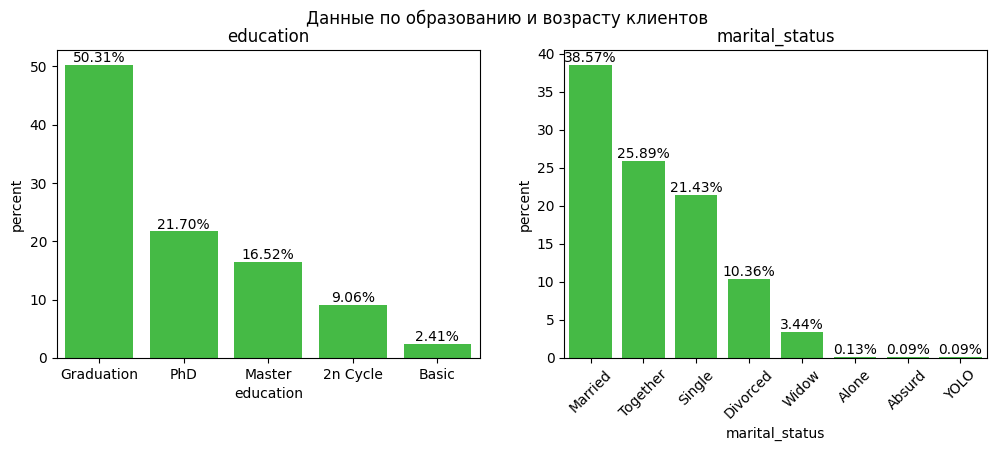

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Данные по образованию и возрасту клиентов")
plt.xticks(rotation=45)
i = 0
for feat in cat_features:
    pl = sns.countplot(
        df,
        x=feat,
        color="limegreen",
        ax=ax[i],
        stat="percent",
        order=df[feat].value_counts().index,
    )
    ax[i].set_title(feat)
    pl.bar_label(pl.containers[0], fmt="%.2f%%")
    i += 1

Больше всего клиентов (39%) в браке и в отношениях (26%). Также можно alone перевести в single (это одно и тоже значение).\
Большая часть клиентов имеет ученую степень (50%), 21% закончили университет и 16% имеют степень магиста, \
то есть клиенты компании - хорошо образованные люди.

In [34]:
df.replace({"marital_status": ("Alone", "Single")})[:2]

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0



 Рассмотрим бинарные признаки:
 acceptedcmp3, acceptedcmp4, acceptedcmp5, acceptedcmp1, acceptedcmp2, complain, response

In [35]:
grouped = (
    df[
        [
            "acceptedcmp4",
            "acceptedcmp5",
            "acceptedcmp1",
            "acceptedcmp2",
            "acceptedcmp3",
            "response",
        ]
    ]
    .sum()
    .to_frame(name="accempt")
)
grouped

,accempt
acceptedcmp4,167
acceptedcmp5,163
acceptedcmp1,144
acceptedcmp2,30
acceptedcmp3,163
response,334


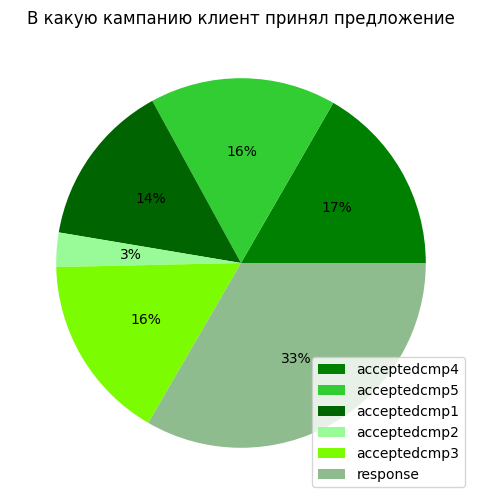

In [36]:
plt.figure(figsize=(6, 6))
plt.title("В какую кампанию клиент принял предложение")
plt.pie(
    grouped.accempt,
    radius=1,
    autopct="%.0f%%",
    colors=["g", "limegreen", "darkgreen", "palegreen", "lawngreen", "darkseagreen"],
)
plt.legend(grouped.accempt.index)
plt.show()

На графике видно, что клиенты в 33% случаев принимали предложение в последней кампании,\
 по 14-17% приходится на 1, 3, 4 и 5 кампании.\
 Самая неудачная кампания номер 2, в ней приняли предложение 3% клиентов.

Text(0.5, 0, 'Жаловался ли клиент?')

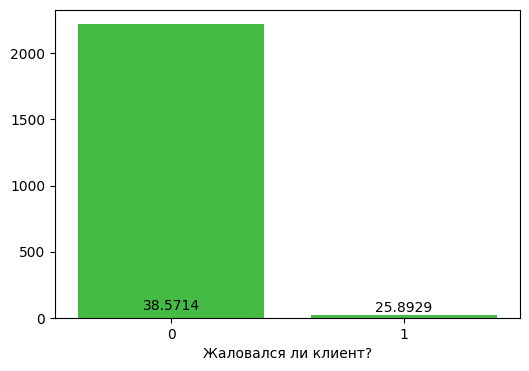

In [37]:
x = df.complain.value_counts()
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=x.index, y=x.values, color="limegreen")
ax.bar_label(pl.containers[0])
plt.xlabel("Жаловался ли клиент?")

Клиентов, которые подавали жалобу в течение последних 2 лет в 10 раз меньше, \
чем клиентов, которые жалобу не подавали.

В  датасете есть столбцы с дискретными признаками: количество детей и подростков в семье клиента - kidhome и teenhome.

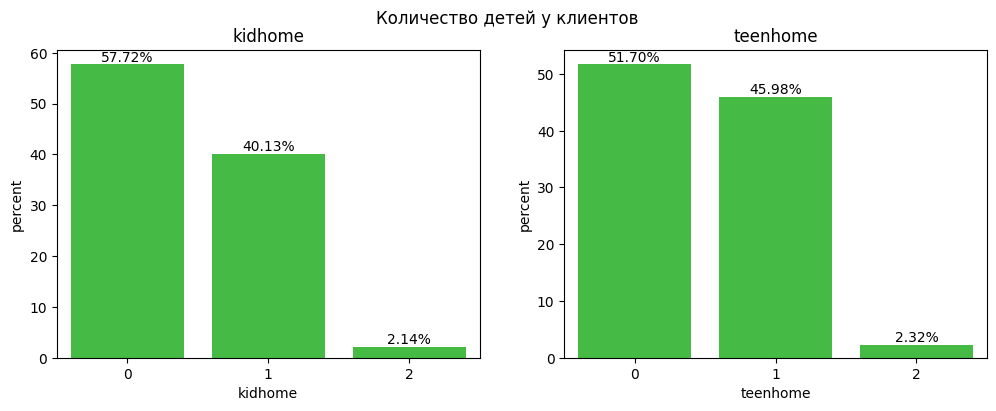

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Количество детей у клиентов")
i = 0
for feat in ["kidhome", "teenhome"]:
    pl = sns.countplot(
        df,
        x=feat,
        color="limegreen",
        ax=ax[i],
        stat="percent",
        order=df[feat].value_counts().index,
    )
    ax[i].set_title(feat)
    pl.bar_label(pl.containers[0], fmt="%.2f%%")
    i += 1

Среди клиентов большинство не имеет детей (58%) и детей-подростков (52%).

<Axes: xlabel='year_birth'>

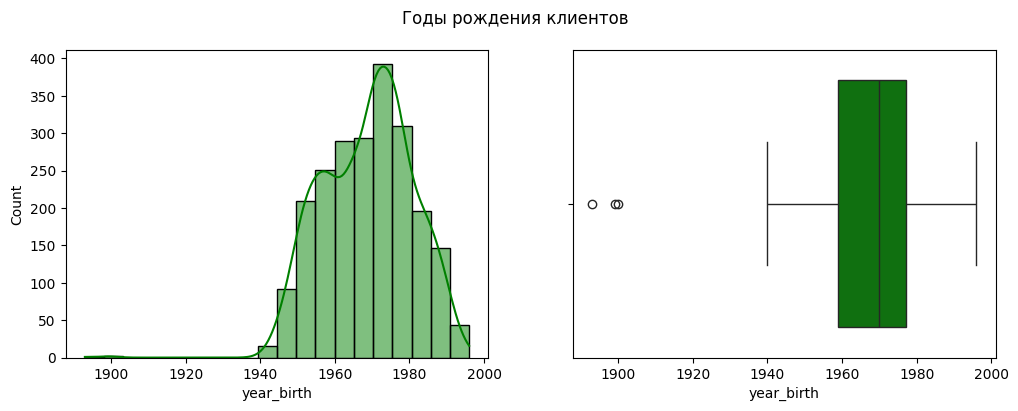

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Годы рождения клиентов")

sns.histplot(df, x="year_birth", ax=ax[0], bins=20, color="green", kde=True)
sns.boxplot(df, x="year_birth", ax=ax[1], color="green")

Распределение по возрасту близко к нормальному, есть несколько выбросов. \
Большинство клиентов рождены в период с 1960 по 1980 годы.

In [40]:
df.loc[df.year_birth <= 1910]

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


В Википедии есть всего 1 человек, проживший более 120 лет и год рождения не совпадает. Есть 3 человека, подходящие по году и возрасту, но можно предположить, что это выбросы (вряд ли они пили вино и делали заказы онлайн). Удалим эти две строки.

In [41]:
df = df.loc[df.year_birth >= 1900]

Посмотрим выбросы по доходам клиента, так как ранее было видно большой разрыв между 75 квартилем и максимумом.

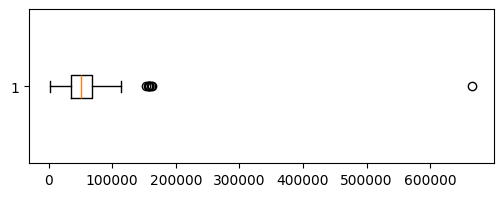

In [42]:
plt.figure(figsize=(6, 2))
plt.boxplot(x=df.income, vert=False)
plt.show()

In [43]:
df.loc[df["income"] > 200000]

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
2233,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


In [44]:
(df.loc[df["income"] > 200000].shape[0] / df.shape[0]) * 100

0.044682752457551385

Выброс всего один, считаю нужным его удалить. Он составляет всего 0.04% от данных.

In [45]:
df = df.loc[df["income"] < 200000]

<Axes: xlabel='income'>

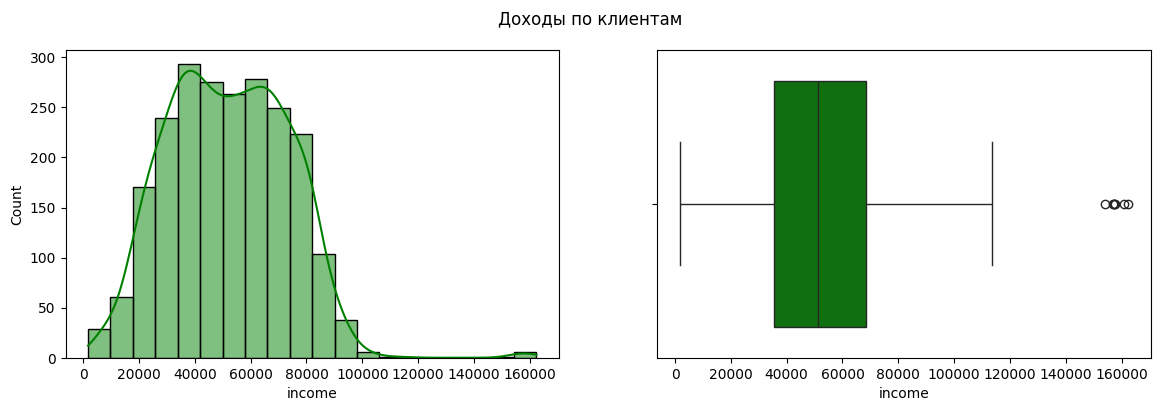

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Доходы по клиентам")

sns.histplot(df, x="income", ax=ax[0], bins=20, color="green", kde=True)
sns.boxplot(df, x="income", ax=ax[1], color="green")

Основная масса клиентов зарабатывает от 30.000 до 80.000. \
Есть небольшие выбросы, распределение близкое к нормальному.

<Axes: xlabel='recency'>

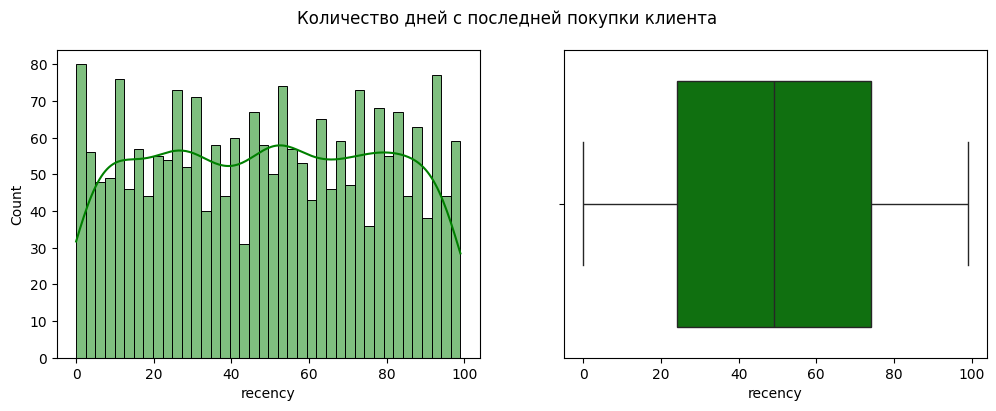

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Количество дней с последней покупки клиента")

sns.histplot(df, x="recency", ax=ax[0], bins=40, color="green", kde=True)
sns.boxplot(df, x="recency", ax=ax[1], color="green")

In [48]:
df.recency.value_counts(normalize=True, bins=10)

(49.5, 59.4]    0.104604
(19.8, 29.7]    0.104604
(-0.1, 9.9]     0.104157
(79.2, 89.1]    0.102369
(69.3, 79.2]    0.100134
(9.9, 19.8]     0.099687
(89.1, 99.0]    0.097452
(39.6, 49.5]    0.096558
(29.7, 39.6]    0.095217
(59.4, 69.3]    0.095217
Name: proportion, dtype: float64

Количество дней со дня покупки имеет равномерное распределение.

Посмотрим значения по тратам клиента.

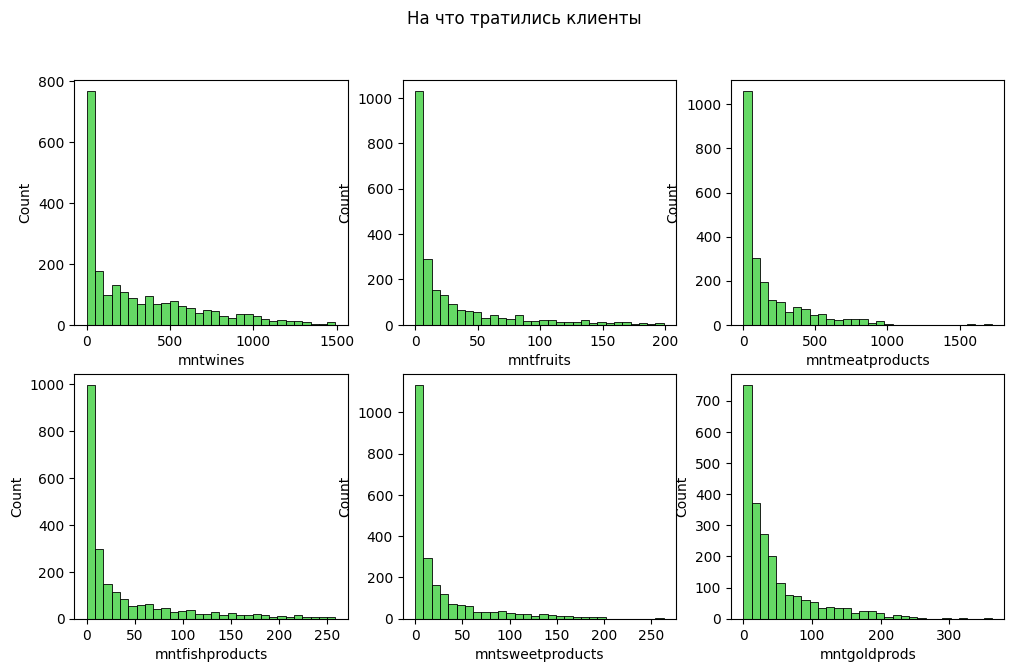

In [49]:
fig, ax = plt.subplots(2, 3, figsize=(12, 7))
fig.suptitle("На что тратились клиенты")
i, j = 0, 0

good_types = [
    "mntwines",
    "mntfruits",
    "mntmeatproducts",
    "mntfishproducts",
    "mntsweetproducts",
    "mntgoldprods",
]
for feat in good_types:
    sns.histplot(df[feat], ax=ax[i][j], color="limegreen", bins=30)
    j += 1
    if j == 3:
        i = 1
        j = 0

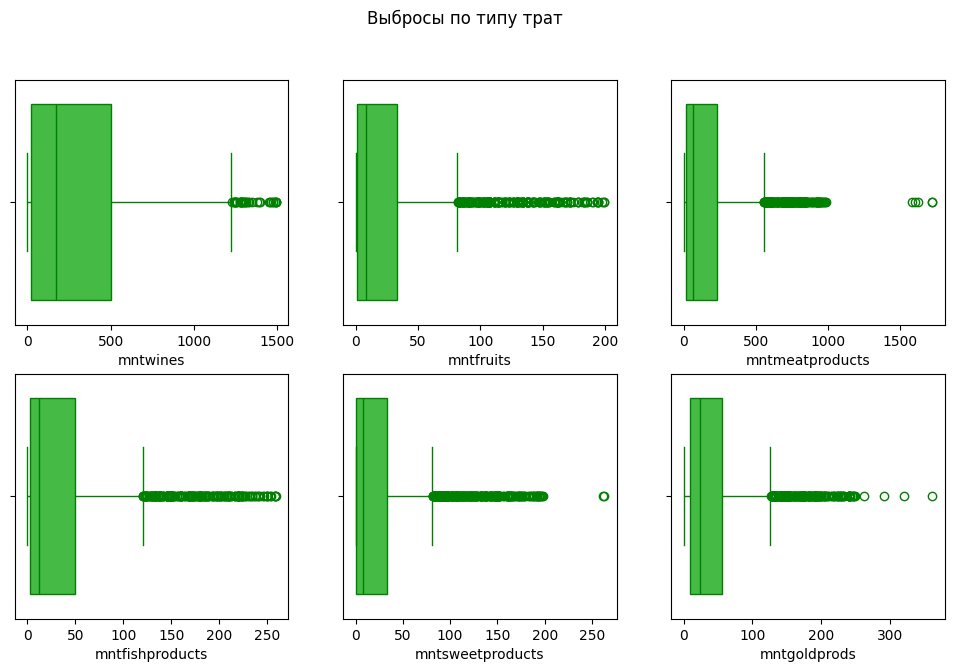

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(12, 7))
fig.suptitle("Выбросы по типу трат")
i, j = 0, 0

for feat in good_types:
    sns.boxplot(df, x=feat, ax=ax[i][j], color="limegreen", linecolor="green")
    j += 1
    if j == 3:
        i = 1
        j = 0

Графики распределения похожи между собой: они скошенные по оси абсцисса.\
Наблюдается обратная пропорция: большинство клиентов тратили меньше, а меньшинство больше.\
По всем типам трат, особенно это касается золота и мясных продуктов, есть выбросы.

Посмотрим, как связаны покупки со скидками с количеством покупок в магазине/каталоге/интернете.

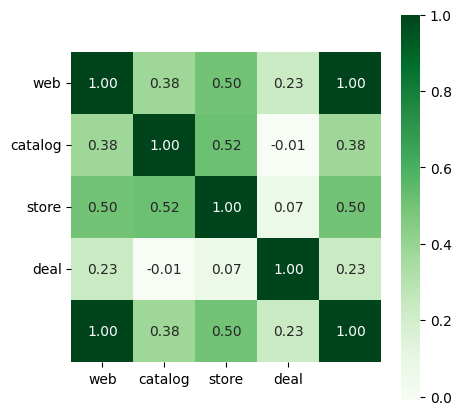

In [51]:
plt.figure(figsize=(5, 5))
sns.heatmap(
    df[
        [
            "numwebpurchases",
            "numcatalogpurchases",
            "numstorepurchases",
            "numdealspurchases",
            "numwebpurchases",
        ]
    ].corr(),
    cmap="Greens",
    fmt=".2f",
    annot=True,
    square=True,
    xticklabels=["web", "catalog", "store", "deal"],
    yticklabels=["web", "catalog", "store", "deal"],
)
plt.yticks(rotation=0)
plt.show()

Покупки со скидкой слабо связаны с покупками через интернет.\
Мы видим, что покупки в разных местах имеют умеренную связь. 

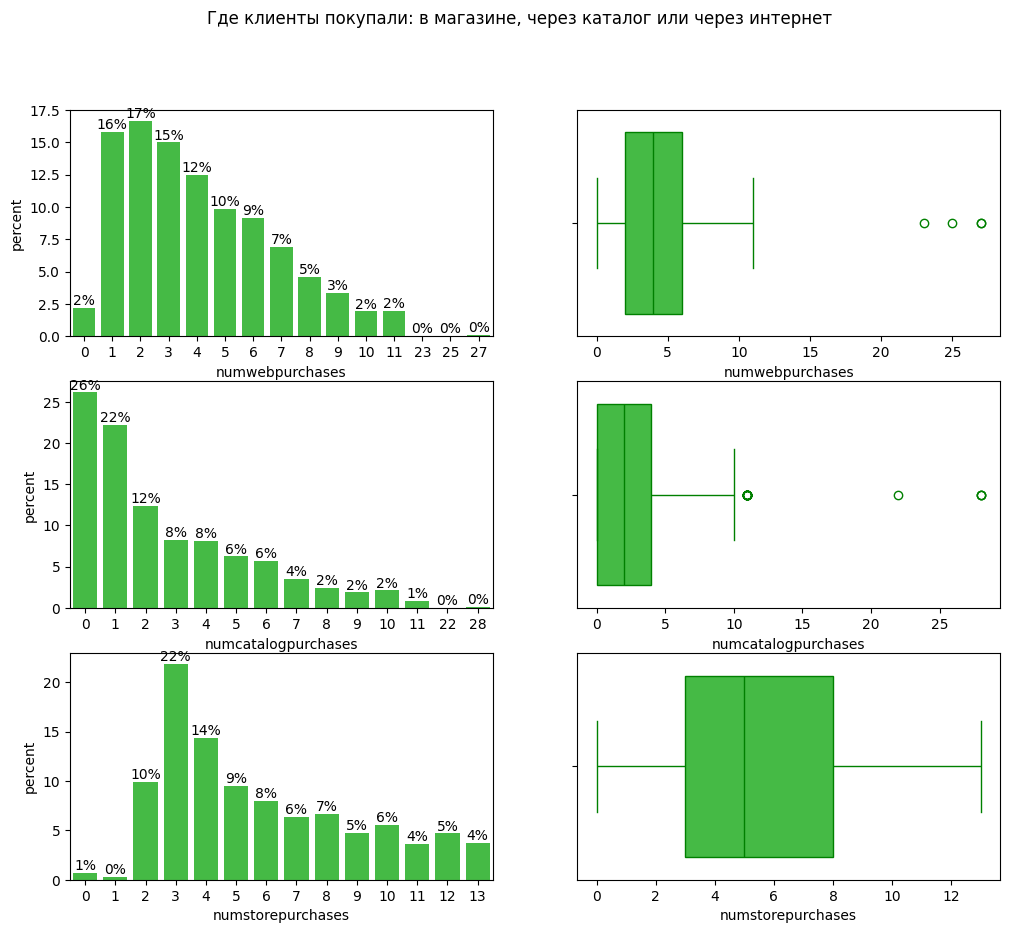

In [52]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Где клиенты покупали: в магазине, через каталог или через интернет")
i, j = 0, 0

for feat in ["numwebpurchases", "numcatalogpurchases", "numstorepurchases"]:
    pl = sns.countplot(
        df,
        x=feat,
        color="limegreen",
        ax=ax[i][j],
        stat="percent",
    )
    pl.bar_label(pl.containers[0], fmt="%.0f%%")
    j += 1
    sns.boxplot(df, x=feat, ax=ax[i][j], color="limegreen", linecolor="green")
    i += 1
    j = 0
plt.show()

Через интернет основная масса клиентов заказывала 1-4 раза (60%).\
26% клиентов не делали покупок по каталогу, а 22% сделали всего 1 покупку.\
В магазине большинство клиентов совершили 2-4 покупки (46%).

<Axes: xlabel='numdealspurchases'>

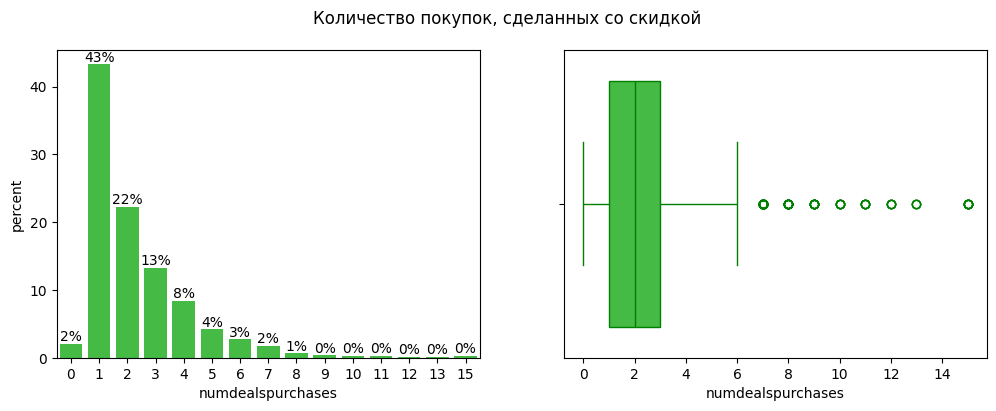

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Количество покупок, сделанных со скидкой")
pl = sns.countplot(
    df,
    x="numdealspurchases",
    color="limegreen",
    ax=ax[0],
    stat="percent",
)
pl.bar_label(pl.containers[0], fmt="%.0f%%")
sns.boxplot(df, x="numdealspurchases", ax=ax[1], color="limegreen", linecolor="green")

In [54]:
((df.loc[df.numdealspurchases > 7]).shape[0] / df.shape[0]) * 100

2.056325435851587

Распреление скошенное, но близко к нормальному.
Со скидкой клиенты делали в основном 1-2 покупки (65%). Но есть клиенты, которые делали от 8 таких покупок (2%).

<Axes: xlabel='numwebvisitsmonth'>

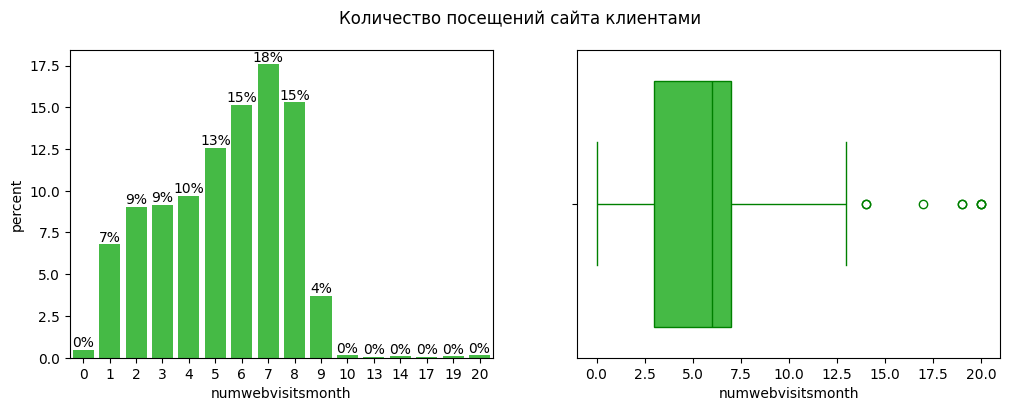

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Количество посещений сайта клиентами")
pl = sns.countplot(
    df,
    x="numwebvisitsmonth",
    color="limegreen",
    ax=ax[0],
    stat="percent",
)
pl.bar_label(pl.containers[0], fmt="%.0f%%")
sns.boxplot(df, x="numwebvisitsmonth", ax=ax[1], color="limegreen", linecolor="green")

Распределение скошенное, небольшие выбросы. \
Большинство клиентов посещают сайт от 6-8 раз (48%).\
Интересно посмотреть связь посещения сайта и интернет-покупок.

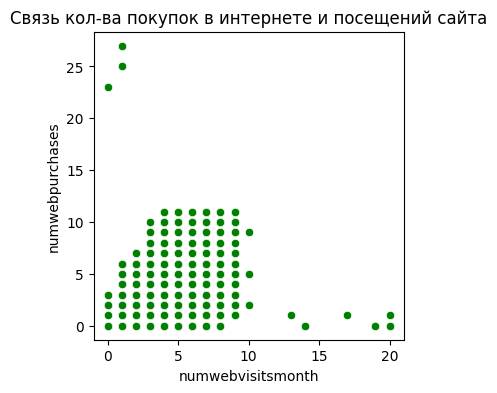

In [56]:
plt.figure(figsize=(4, 4))
plt.title("Связь кол-ва покупок в интернете и посещений сайта")
sns.scatterplot(df, x="numwebvisitsmonth", y="numwebpurchases", color="g")
plt.show()

Странно, что посещение сайта и покупки через интернет слабо связаны (возможно, покупки происходят не на сайте компании?)

**Вывод:**
- среди клиентов большинство не имеет детей (58%) и детей-подростков (52%);
- со скидкой клиенты делали в основном 1-2 покупки (65%);
- в 33% случаев клиенты принимали предложение в последней кампании,  14-17% в кампаниях 1, 3, 4 и 5;
- клиентов, которые подавали жалобу в течение последних 2 лет в 10 раз меньше, чем клиентов, которые жалобу не подавали;
- большая часть клиентов зарабатывает от 30.000 до 80.000;
- большая часть клиентов хорошо образована, только 2% клиентов имеют среднее образование;
- по всем категориям товара наблюдается следующая картина:\
большинство клиентов тратят меньше, а меньшинство - больше;
- покупки совершались:\
-- через интернет 1-4 покупки (60%);\
-- 26% клиентов не делали покупок по каталогу, а 22% сделали всего 1 покупку;\
-- в магазине 2-4 покупки (46%).

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?

In [57]:
grouped = df[good_types].mean().to_frame(name="mean_mnt")
grouped

,mean_mnt
mntwines,303.998212
mntfruits,26.266875
mntmeatproducts,166.912383
mntfishproducts,37.522575
mntsweetproducts,27.070183
mntgoldprods,43.974519


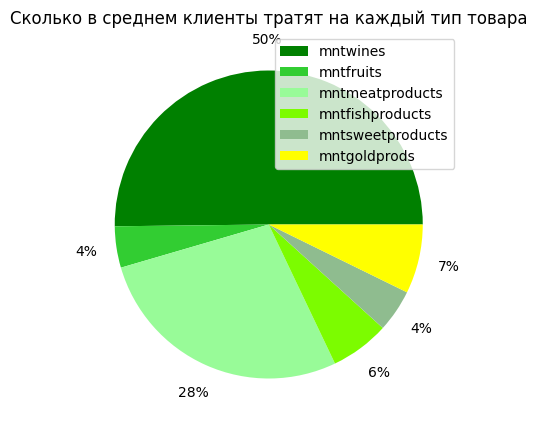

In [58]:
plt.figure(figsize=(5, 5))
plt.title("Сколько в среднем клиенты тратят на каждый тип товара")
plt.pie(
    grouped.mean_mnt,
    autopct="%.0f%%",
    pctdistance=1.2,
    colors=[
        "g",
        "limegreen",
        "palegreen",
        "lawngreen",
        "darkseagreen",
        "yellow",
    ],
)
plt.legend(grouped.mean_mnt.index)
plt.show()

*Вывод:*\
Больше всего в среднем клиенты тратят деньги на вино - 50% общих средних трат. \
На втором месте находятся мясные продукты - 28%. Самые малые доли по 4 % у фруктов и сладостей. \
Необходимо сделать акцент на мясные продукты и золото, так как они находятся на 2 и 3 местах по средним тратам. \
Два типа продуктов, так как бизнес нужно диверсифицировать.

2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?

In [59]:
df["age"] = df.dt_customer.max().year - df.year_birth
int(df.age.mean())

45

In [60]:
grouped = df.groupby("age")[good_types].mean().reset_index()
grouped.head(2)

,age,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,18,1.5,9.0,8.0,9.0,12.5,29.0
1,19,284.2,19.8,323.0,50.4,53.6,30.2


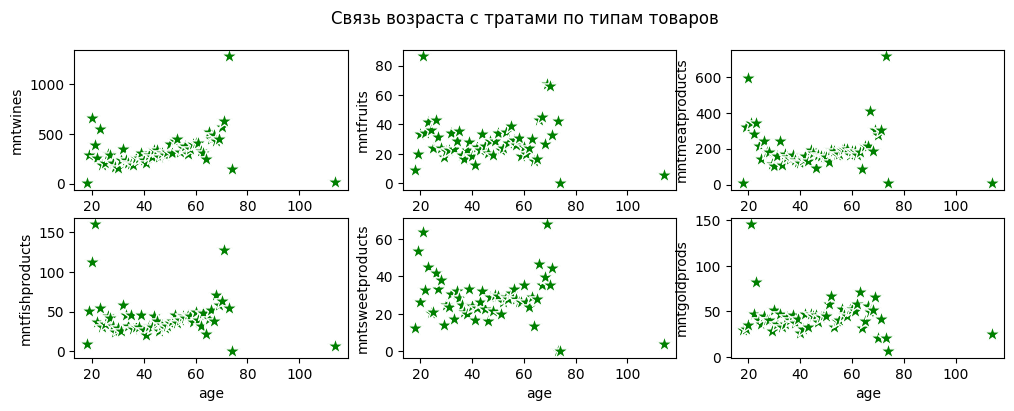

In [61]:
fig, ax = plt.subplots(2, 3, figsize=(12, 4))
fig.suptitle("Связь возраста с тратами по типам товаров")
i, j = 0, 0
for feat in good_types:
    sns.scatterplot(
        x="age", y=feat, data=grouped, color="g", marker="*", s=150, ax=ax[i][j]
    )
    j += 1
    if j == 3:
        i = 1
        j = 0
plt.show()

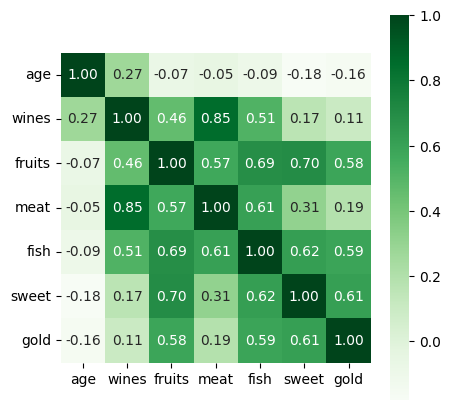

In [62]:
plt.figure(figsize=(5, 5))
good_types_list = ["wines", "fruits", "meat", "fish", "sweet", "gold"]
sns.heatmap(
    grouped.corr(),
    cmap="Greens",
    fmt=".2f",
    annot=True,
    square=True,
    xticklabels=["age"] + good_types_list,
    yticklabels=["age"] + good_types_list,
)
plt.yticks(rotation=0)
plt.show()

*Вывод:*\
Связь между возрастом клиента и тратами на вино близка к умеренной. \
Также наблюдается слабая связь возраста клиента и его трат на сладости и золото.\
Средний возраст покупателя - 45 лет.

3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?


Будем считать, что много детей это более одного ребенка.

In [63]:
# проверка есть ли клиенты у кого и детей и иждивенцев более 1 одновременно
df.loc[(df.kidhome > 1) & (df.teenhome > 1)].shape

(0, 27)

In [64]:
lot_kids = (
    df.loc[(df.kidhome > 1) | (df.teenhome > 1)][good_types].mean().to_frame("lot")
)
few_kids = (
    df.loc[(df.kidhome <= 1) | (df.teenhome <= 1)][good_types].mean().to_frame("few")
)

grouped = pd.concat([lot_kids, few_kids], join="outer", axis=1).reset_index(
    names="good_type"
)
grouped

,good_type,lot,few
0,mntwines,224.11,303.998212
1,mntfruits,12.36,26.266875
2,mntmeatproducts,81.12,166.912383
3,mntfishproducts,16.14,37.522575
4,mntsweetproducts,10.62,27.070183
5,mntgoldprods,31.73,43.974519


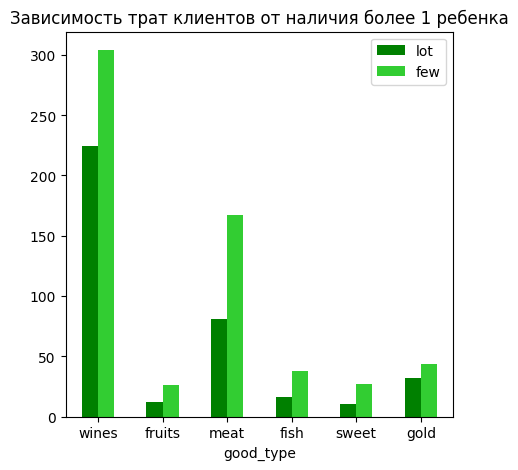

In [65]:
ax = grouped.plot(
    kind="bar",
    x="good_type",
    color={"lot": "green", "few": "limegreen"},
    figsize=(5, 5),
    title="Зависимость трат клиентов от наличия более 1 ребенка",
    rot=0,
)
ax.set_xticklabels(good_types_list)
plt.show()

In [66]:
print(
    f"Общие средние траты клиента с одним ребенком или без детей: {grouped.few.sum().round()},\n\
      с более чем одним ребенком: {grouped.lot.sum().round()}"
)

Общие средние траты клиента с одним ребенком или без детей: 606.0,
      с более чем одним ребенком: 376.0


*Вывод:*\
Если у клиента более 1 ребенка / иждивенца, то траты и по категориям и вцелом меньше, \
чем у клиентов с 1 ребенком/иждивенцем и без детей.

4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?


In [67]:
df["mnt_total"] = df[good_types].sum(axis=1)

In [68]:
# посмотрим вначале на общие траты в зависимости от образования
df.groupby("education")["mnt_total"].mean().reset_index()

,education,mnt_total
0,2n Cycle,498.876238
1,Basic,81.796296
2,Graduation,620.394316
3,Master,611.781081
4,PhD,669.975258


In [69]:
grouped = df.groupby("education")[good_types].mean().reset_index()
grouped

,education,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,2n Cycle,199.123762,29.099010,141.930693,47.683168,34.420792,46.618812
1,Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
2,Graduation,284.513321,30.789520,179.632327,43.181172,31.394316,50.883659
3,Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297
4,PhD,403.773196,19.793814,167.791753,26.569072,20.131959,31.915464


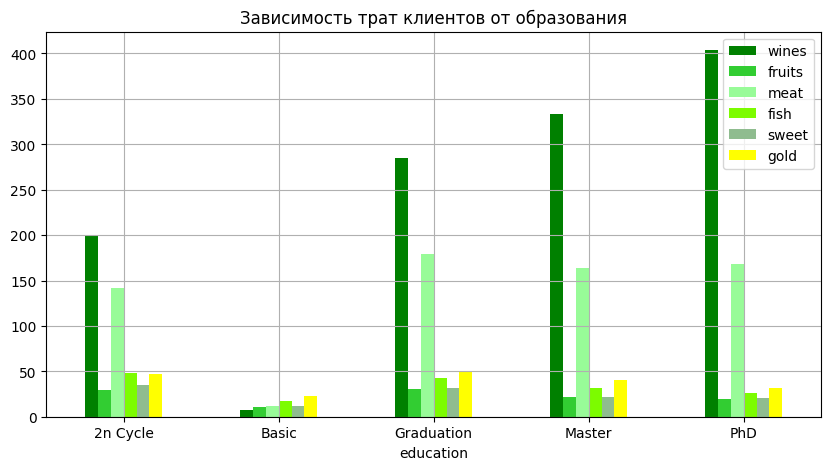

In [70]:
ax = grouped.plot(
    kind="bar",
    x="education",
    color={
        "mntwines": "green",
        "mntfruits": "limegreen",
        "mntmeatproducts": "palegreen",
        "mntfishproducts": "lawngreen",
        "mntsweetproducts": "darkseagreen",
        "mntgoldprods": "yellow",
    },
    figsize=(10, 5),
    title="Зависимость трат клиентов от образования",
    rot=0,
    grid=True,
)
ax.legend(good_types_list)
plt.show()

*Вывод:*\
Люди, защитившие диссертацию (PhD) больше всего и больше всех тратятся на вино.\
Люди со средним образованием (Basic) меньше всех тратят во всех категориях.\
На мясные группы люди тратят примерно одинаково (кроме Basic).\
На золото, фрукты, рыбу и сладости больше всего тратят люди с высшими образованиями (Graduation и 2n Cycle).


5. Женатые люди тратят больше или меньше денег на покупку золота?


In [71]:
df.groupby("marital_status")["mntgoldprods"].mean().to_frame()

,mntgoldprods
marital_status,
Absurd,204.000000
Alone,27.000000
Divorced,46.288793
Married,42.822917
Single,43.816284
Together,42.735294
Widow,56.766234
YOLO,42.000000


<Axes: title={'center': 'Траты на золото в зависимости от статуса клиента'}, xlabel='marital_status', ylabel='mntgoldprods'>

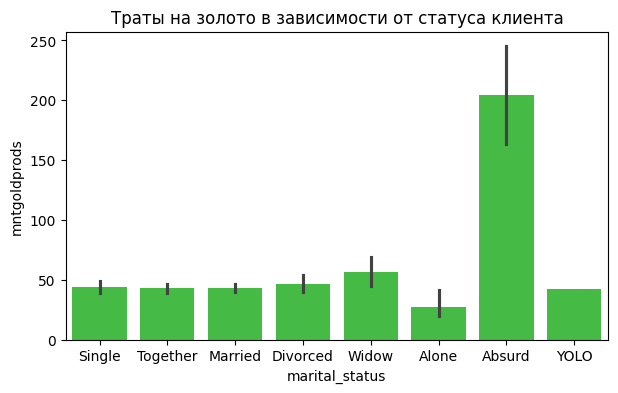

In [72]:
plt.figure(figsize=(7, 4))
plt.title("Траты на золото в зависимости от статуса клиента")
sns.barplot(x=df.marital_status, y=df.mntgoldprods, color="limegreen")

*Вывод:*\
Женатые клиенты в среднем покупают золота на такие же суммы, как и свободые клиенты и клиенты в отношениях. 

6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?


Н0: связи нет\
Н1: связь есть

In [73]:
cols = ["numwebpurchases", "numcatalogpurchases", "numstorepurchases"]
for col in cols:
    correlation, pvalue = stats.pearsonr(df.numdealspurchases, df[col])
    print(
        f"Корреляция между numdealspurchases и {col} равна: {correlation:.5f}, p: {pvalue:.15f}"
    )

    alpha = 0.05

    if pvalue < alpha:
        print("Вероятно, имеют монотонную взаимосвязь (отклоняем H0)")
    else:
        print("Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)")
    print("---------------------")

Корреляция между numdealspurchases и numwebpurchases равна: 0.23415, p: 0.000000000000000
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
---------------------
Корреляция между numdealspurchases и numcatalogpurchases равна: -0.00833, p: 0.693609650951973
Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)
---------------------
Корреляция между numdealspurchases и numstorepurchases равна: 0.06875, p: 0.001139518260929
Вероятно, имеют монотонную взаимосвязь (отклоняем H0)
---------------------


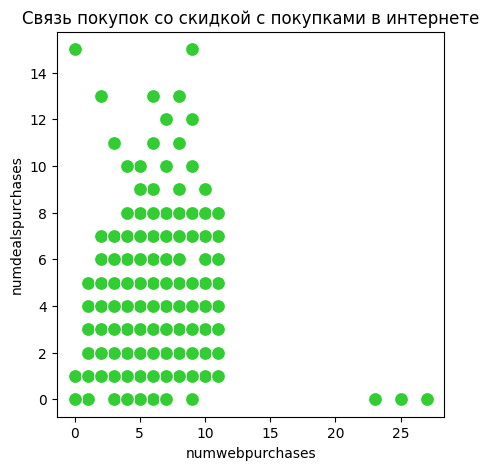

In [74]:
plt.figure(figsize=(5, 5))
plt.title("Связь покупок со скидкой с покупками в интернете")
sns.scatterplot(
    y="numdealspurchases", x="numwebpurchases", data=df, color="limegreen", s=100
)
plt.show()

*Вывод:*\
Связь между покупками со скидкой и покупками в интернете слабая, \
но в сравнении с .покупками в других местах эта связь выше

7. Зависит ли жалоба клиента от его трат?


In [75]:
grouped = df.groupby("complain").agg({"mnt_total": "mean", "complain": "count"})
grouped

,mnt_total,complain
complain,,
0,607.917870,2216
1,376.428571,21


<Axes: ylabel='mnt_total'>

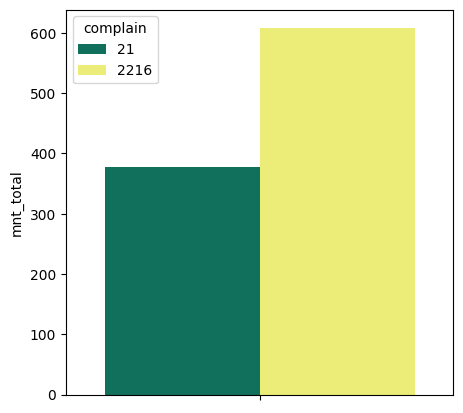

In [76]:
plt.figure(figsize=(5, 5))
sns.barplot(y=grouped.mnt_total, palette="summer", hue=grouped.complain)

*Вывод:*\
Клиенты, которые оставляли жалобы и тратились меньше.
Но сложно дать такой однозначный ответ, так как клиентов с жалобами в 10 раз меньше (всего 21 человек).

8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

In [77]:
print(
    f"Люди, принявшие сразу предложение первой компании тратят: {df.loc[df.acceptedcmp1 == 1].mnt_total.mean().round(2)},\n\
Люди, принявшие предложение о покупке лишь в последней компании тратят: {df.loc[df.response == 1].mnt_total.mean().round(2)}"
)

Люди, принявшие сразу предложение первой компании тратят: 1482.22,
Люди, принявшие предложение о покупке лишь в последней компании тратят: 987.39


*Вывод:*\
 Люди, принявшие предложение о покупке лишь в последней компании тратят меньше, чем люди, \
 принявшие сразу предложение первой компании.

**Выводы:**
1. Больше всего клиенты тратят деньги на вино, на это приходится 50% общих трат. \
Люди, защитившие диссертацию (PhD) больше всех тратятся на вино.\
Наблюдается умеренная связь между возрастом клиента и его тратами на вино;
2. На втором месте по тратам находятся мясные продукты - 28%.\
На мясные продукты клиенты тратят примерно одинаково (кроме Basic).\
3. Самые малые доли по 4 % у фруктов и сладостей. \
На эти товары больше всего тратят люди с высшими образованиями (Graduation и 2n Cycle);
4. Клиенты со средним образованием (Basic) меньше всех тратят во всех категориях.\
5. Клиенты с большим количеством детей тратят меньше по всем категориям товаров;
6. Средний возраст клиента - 45 лет.
7. Несмотря на успех привлечения клиентов в последней кампании, клиенты, пришедшие\
в первую кампанию тратят больше.
8. Наблюдается слабая связь между покупками со скидкой и покупками в интернете, \
но в сравнении с покупками в других местах эта связь выше;
9. Клиенты, которые оставляют жалобы, тратяться меньше (это необходимо проверить на расширенных данных);

### ЗАДАНИЕ ПРО

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

##### Матрица корреляции признаков Phik

In [78]:
# phik_overview = df.phik_matrix()

# plot_correlation_matrix(
#     phik_overview.values,
#     x_labels=phik_overview.columns,
#     y_labels=phik_overview.index,
#     vmin=0,
#     vmax=1,
#     color_map="Greens",
#     title=r"correlation $\phi_K$",
#     fontsize_factor=0.8,
#     figsize=(10, 10),
# )
# plt.tight_layout()

**Вывод:**

# Общий вывод

Описание датасета:
- После предобработки датасет состоит из 2240 строк и 26 столбцов, и не содержит пропусков;
- В датасете 3 столбца типа object и 26 int/float;
- 2 столбца типа object, 1 столбец типа datetime и 24 столбца - int/float;
- Бинарные столбцы: acceptedcmp3, acceptedcmp4, acceptedcmp5, acceptedcmp1, acceptedcmp2, complain, response\
75% значений в каждом равны 0;
- Среди клиентов большинство не имеет детей (58%) и детей-подростков (52%);
- В столбце education 50% значений составляет Graduation, только 2% клиентов имеют среднее образование,\
столбец содержит 5 уникальных значений (ранговых);
- Средний возраст клиента - 45 лет; 
- 38% клиентов находятся в браке;
- большая часть клиентов зарабатывает от 30.000 до 80.000;
- клиентов, которые подавали жалобу в течение последних 2 лет в 10 раз меньше, чем тех, которые жалобу не подавали;

Аналитика:
- скидки:\
-- со скидкой клиенты делали в основном 1-2 покупки (65%);\
-- есть связь между покупками со скидкой и покупками в интернете;\
- жалобы:\
-- клиенты, оставляющие жалобы, тратяться меньше;\
- кампании:\
-- в 33% случаев клиенты приняли предложение в последней кампании, но, клиенты, пришедшие\
в первую кампанию (14%) тратят больше, чем пришедшие в последнюю;
- точки продаж:\
-- через интернет в среднем 1-4 покупки (60%);\
-- 26% клиентов не делали покупок по каталогу, а 22% сделали всего 1 покупку;\
-- в магазине в среднем 2-4 покупки (46%).\
- категории товара:\
-- 50% трат приходится на вино, размер трат зависит от возраста; \
-- 28% трат на мясные продукты, их клиенты (кроме Basic) покупают не зависимо от образования;\
-- клиенты со средним образованием (Basic) меньше всех тратят во всех категориях;\
-- многодетные клиенты покупают меньше;\
-- по всем категориям товара большинство клиентов покупает меньше, а меньшинство - больше;


Необходимо сделать:
- акцент на мясные продукты;
- акцент на золото, учитывая наличие связи продаж с возрастом клиента;
- пересмотреть систему скидок, так как со скидкой совершалось большей частью (65%) 1-2 покупки;
- разобрать ошибки неудачной кампания номер 2 (3% клиентов);
- либо отказаться от каталога, либо продвигать его, так как 26% клиентов не делали покупок по каталогу.